In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 8E56-AFA1

 Directory of C:\Users\HARI KISHAN\cat

27-09-2022  14:11    <DIR>          .
27-09-2022  14:08    <DIR>          ..
27-09-2022  14:11    <DIR>          .ipynb_checkpoints
27-09-2022  13:10             1,408 app.py
27-09-2022  14:01           466,081 CarPrice Prediction.ipynb
07-08-2022  09:04           433,214 Dataset.csv
27-09-2022  14:08    <DIR>          his
27-09-2022  14:10    <DIR>          templates
               3 File(s)        900,703 bytes
               5 Dir(s)  194,607,099,904 bytes free


In [3]:
df = pd.read_csv("Dataset.csv",na_values= np.inf)
df.head(3)

,Unnamed: 0,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,...,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2
0,0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,...,0,2.352941e-06,0.000103,0.200000,0.142857,0.143417,0.035730,0.132143,677.134239,0.0
1,1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,...,0,3.076923e-06,0.000008,0.111111,0.090909,0.188859,0.002496,0.079545,37.501318,0.0
2,2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,...,0,3.773585e-07,0.000015,0.250000,1.000000,0.019416,0.004978,1.000000,96.646020,0.0


In [4]:
df.shape

(1725, 23)

In [5]:
df.columns

Index(['Unnamed: 0', 'Id', 'year', 'brand', 'full_model_name', 'model_name',
       'price', 'distance_travelled(kms)', 'fuel_type', 'city', 'brand_rank',
       'car_age', 'distance below 30k km', 'new and less used',
       'inv_car_price', 'inv_car_dist', 'inv_car_age', 'inv_brand',
       'std_invprice', 'std_invdistance_travelled', 'std_invrank', 'best_buy1',
       'best_buy2'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0                    0
Id                            0
year                          0
brand                         0
full_model_name               0
model_name                    0
price                         0
distance_travelled(kms)       0
fuel_type                     0
city                          0
brand_rank                    0
car_age                       0
distance below 30k km         0
new and less used             0
inv_car_price                 0
inv_car_dist                  0
inv_car_age                  21
inv_brand                     0
std_invprice                  0
std_invdistance_travelled     0
std_invrank                   0
best_buy1                     0
best_buy2                     0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1724
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1704 non-null   int64  
 1   year                       1704 non-null   int64  
 2   brand                      1704 non-null   object 
 3   full_model_name            1704 non-null   object 
 4   model_name                 1704 non-null   object 
 5   price                      1704 non-null   float64
 6   distance_travelled(kms)    1704 non-null   float64
 7   fuel_type                  1704 non-null   object 
 8   city                       1704 non-null   object 
 9   brand_rank                 1704 non-null   int64  
 10  car_age                    1704 non-null   float64
 11  distance below 30k km      1704 non-null   int64  
 12  new and less used          1704 non-null   int64  
 13  inv_car_price              1704 non-null   float

In [10]:
df.isnull().sum()

Id                           0
year                         0
brand                        0
full_model_name              0
model_name                   0
price                        0
distance_travelled(kms)      0
fuel_type                    0
city                         0
brand_rank                   0
car_age                      0
distance below 30k km        0
new and less used            0
inv_car_price                0
inv_car_dist                 0
inv_car_age                  0
inv_brand                    0
std_invprice                 0
std_invdistance_travelled    0
std_invrank                  0
best_buy1                    0
best_buy2                    0
dtype: int64

In [11]:
df.describe()

,Id,year,price,distance_travelled(kms),brand_rank,car_age,distance below 30k km,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2
count,1704.000000,1704.000000,1.704000e+03,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1.704000e+03,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000
mean,862.642019,2015.321596,1.487749e+06,54437.968897,15.649061,5.678404,0.260563,0.199531,1.425940e-06,0.000036,0.258832,0.188842,0.085232,0.012206,0.178703,86.388470,29.267389
std,498.047723,3.165782,1.676505e+06,44680.314096,12.785555,3.165782,0.439071,0.399765,1.295964e-06,0.000070,0.202657,0.255999,0.081344,0.024487,0.259199,184.784421,152.160375
min,0.000000,1990.000000,6.250000e+04,700.000000,1.000000,1.000000,0.000000,0.000000,6.802721e-08,0.000001,0.032258,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000
25%,431.750000,2013.000000,5.400000e+05,30000.000000,4.750000,3.000000,0.000000,0.000000,5.555556e-07,0.000014,0.125000,0.041667,0.030601,0.004489,0.029687,14.079171,0.000000
50%,862.500000,2016.000000,8.700000e+05,49998.500000,14.000000,5.000000,0.000000,0.000000,1.149425e-06,0.000020,0.200000,0.071429,0.067876,0.006560,0.059821,35.867806,0.000000
75%,1295.250000,2018.000000,1.800000e+06,71000.000000,24.000000,8.000000,1.000000,0.000000,1.851852e-06,0.000033,0.333333,0.212500,0.111965,0.011229,0.202656,89.593038,0.000000
max,1724.000000,2020.000000,1.470000e+07,790000.000000,81.000000,31.000000,1.000000,1.000000,1.600000e-05,0.001429,1.000000,1.000000,1.000000,0.499778,1.000000,2477.517640,2477.517640


<h3 style="color:red">Univariant Analysis</h3>

In [12]:
# for i in df.columns:
#     try:
#         sns.distplot(df[i])
#         plt.show()
#     except:
#         pass

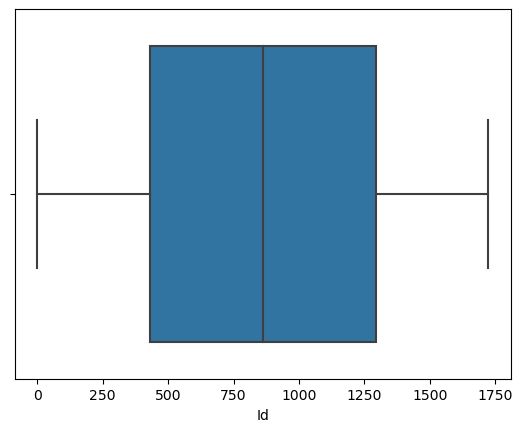

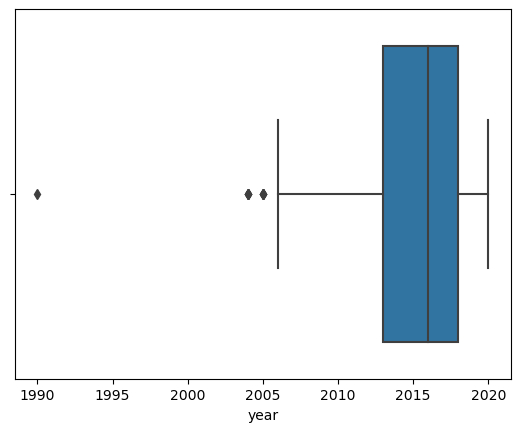

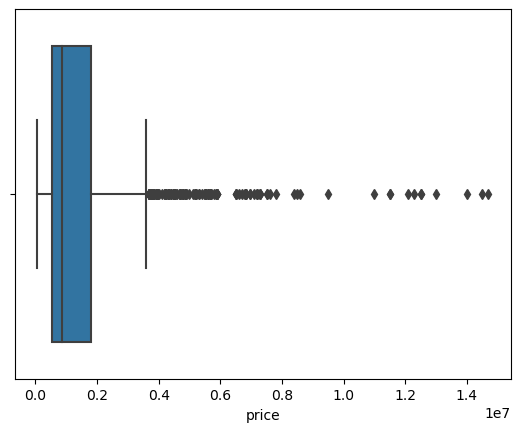

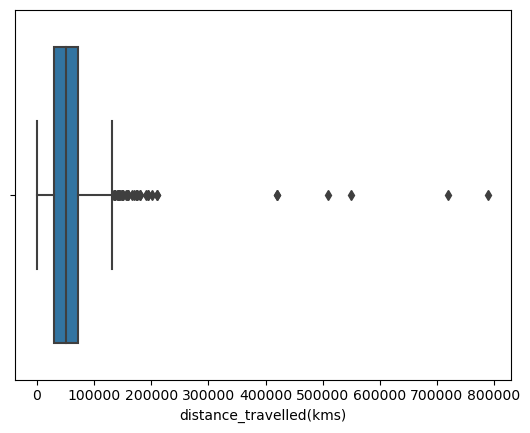

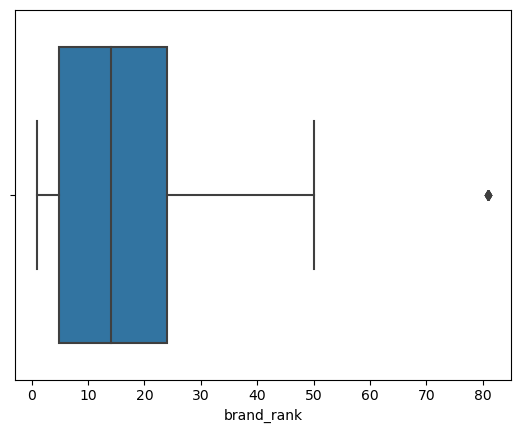

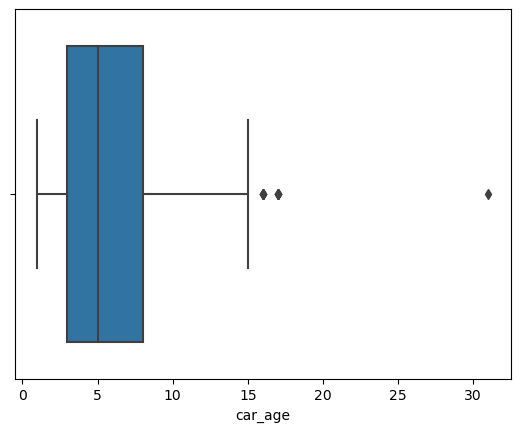

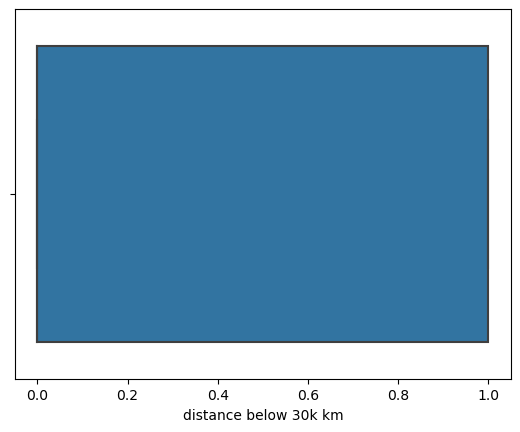

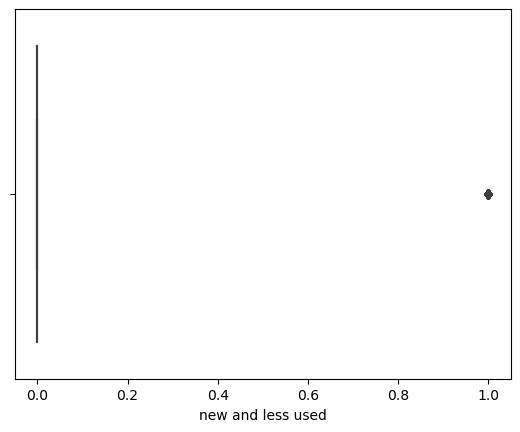

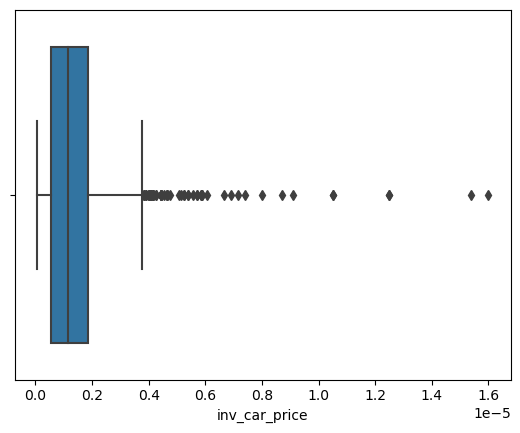

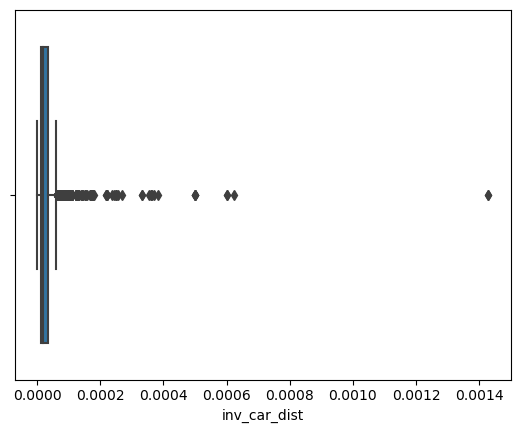

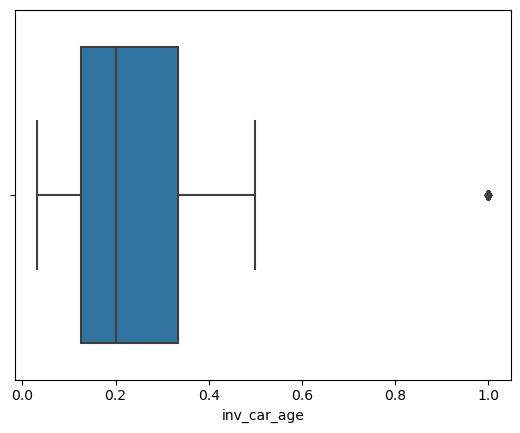

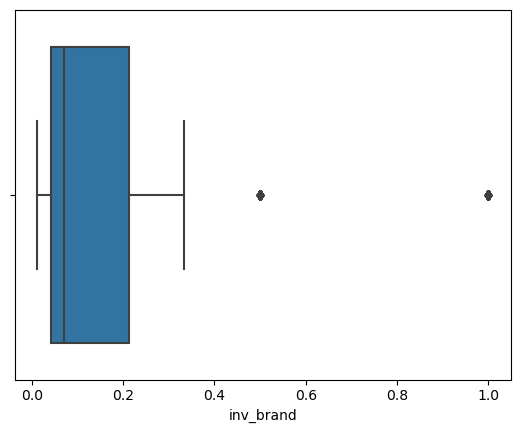

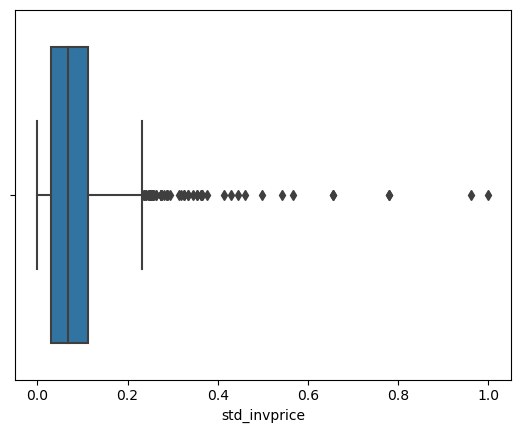

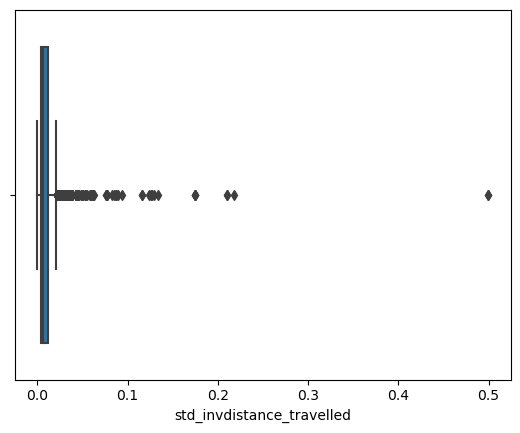

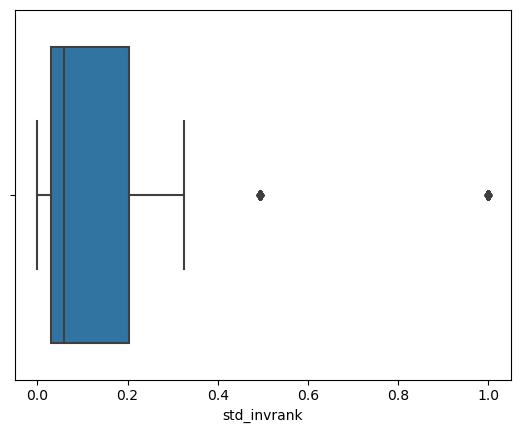

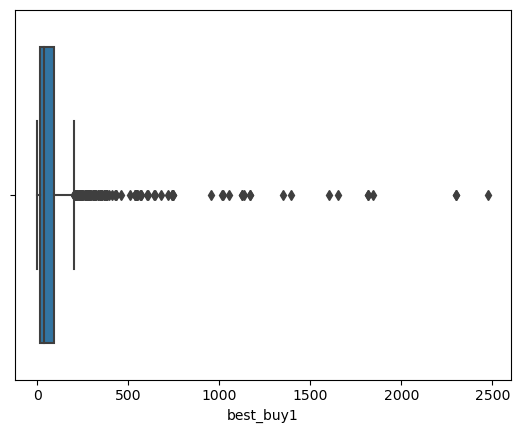

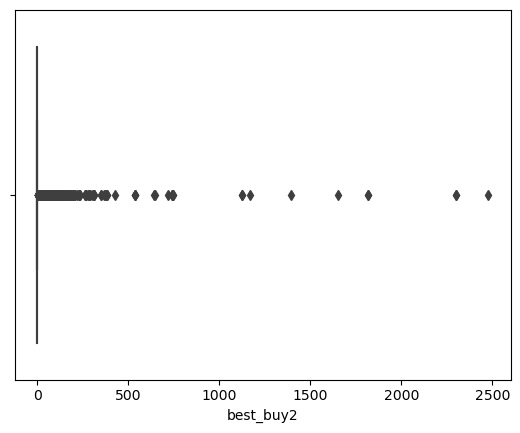

In [13]:
nume=[]
cate=[]
for i in df.columns:
    try:
        sns.boxplot(df[i])
        plt.show()
        nume.append(i)
    except:
        cate.append(i)

<h3 style="color:red">Bi Variant Analysis</h3>

In [14]:
# for i in df.columns:
#     fig = px.histogram(df, x=i, y="price", hover_data=df.columns)
#     fig.show()

In [15]:
# for i in df.columns:
#     fig = px.histogram(df, x=i, y="price",color="price",hover_data=df.columns)
#     fig.show()

In [16]:
# for i in df.columns:
#     fig = px.histogram(df, x=i, y="price",color=i,hover_data=df.columns)
#     fig.show()

In [17]:
# for i in df.columns:
#     try:
#         sns.scatterplot(df[i],y=df["price"])
#         plt.show()
#     except:
#         pass

In [18]:
# plt.figure(figsize=(20,10))
# sns.heatmap(df.corr(),annot=True,cmap="PiYG")
# plt.show()

In [19]:
df.columns

Index(['Id', 'year', 'brand', 'full_model_name', 'model_name', 'price',
       'distance_travelled(kms)', 'fuel_type', 'city', 'brand_rank', 'car_age',
       'distance below 30k km', 'new and less used', 'inv_car_price',
       'inv_car_dist', 'inv_car_age', 'inv_brand', 'std_invprice',
       'std_invdistance_travelled', 'std_invrank', 'best_buy1', 'best_buy2'],
      dtype='object')

In [20]:
df.drop(columns=['best_buy2','inv_brand','distance below 30k km','brand_rank','Id'],inplace=True)

In [21]:
df.columns

Index(['year', 'brand', 'full_model_name', 'model_name', 'price',
       'distance_travelled(kms)', 'fuel_type', 'city', 'car_age',
       'new and less used', 'inv_car_price', 'inv_car_dist', 'inv_car_age',
       'std_invprice', 'std_invdistance_travelled', 'std_invrank',
       'best_buy1'],
      dtype='object')

In [22]:
cate

['brand', 'full_model_name', 'model_name', 'fuel_type', 'city']

In [23]:
nume

['Id',
 'year',
 'price',
 'distance_travelled(kms)',
 'brand_rank',
 'car_age',
 'distance below 30k km',
 'new and less used',
 'inv_car_price',
 'inv_car_dist',
 'inv_car_age',
 'inv_brand',
 'std_invprice',
 'std_invdistance_travelled',
 'std_invrank',
 'best_buy1',
 'best_buy2']

In [24]:
for i in cate:
    x = df[i].nunique()
    print("{} ::  contains ::  {} of Unique vallues".format(i,x))

brand ::  contains ::  31 of Unique vallues
full_model_name ::  contains ::  741 of Unique vallues
model_name ::  contains ::  169 of Unique vallues
fuel_type ::  contains ::  4 of Unique vallues
city ::  contains ::  15 of Unique vallues


In [25]:
df.drop("full_model_name",axis=1,inplace=True)

In [26]:
df.head(2)

,year,brand,model_name,price,distance_travelled(kms),fuel_type,city,car_age,new and less used,inv_car_price,inv_car_dist,inv_car_age,std_invprice,std_invdistance_travelled,std_invrank,best_buy1
0,2016,Honda,Brio,425000.0,9680.0,Petrol,Mumbai,5.0,0,0.000002,0.000103,0.200000,0.143417,0.035730,0.132143,677.134239
1,2012,Nissan,Sunny,325000.0,119120.0,Diesel,Mumbai,9.0,0,0.000003,0.000008,0.111111,0.188859,0.002496,0.079545,37.501318


In [27]:
df.columns

Index(['year', 'brand', 'model_name', 'price', 'distance_travelled(kms)',
       'fuel_type', 'city', 'car_age', 'new and less used', 'inv_car_price',
       'inv_car_dist', 'inv_car_age', 'std_invprice',
       'std_invdistance_travelled', 'std_invrank', 'best_buy1'],
      dtype='object')

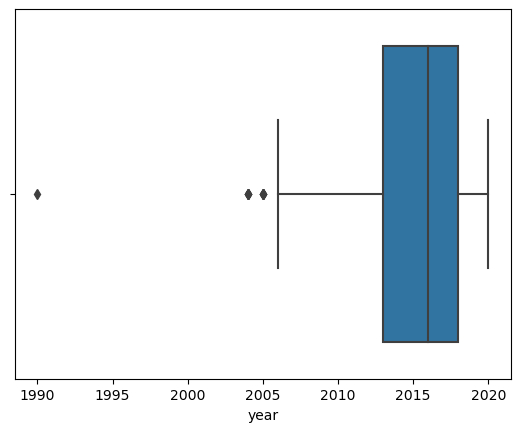

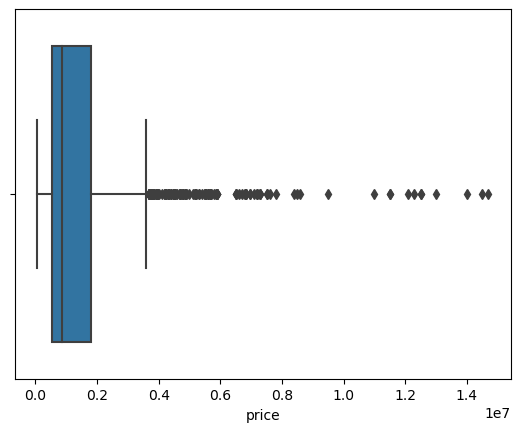

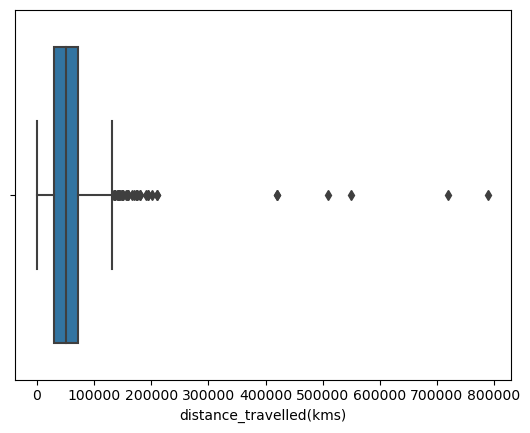

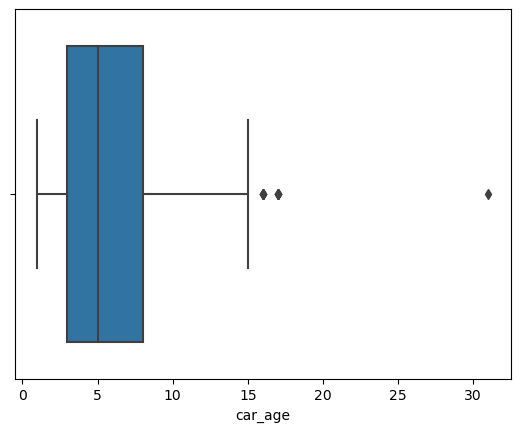

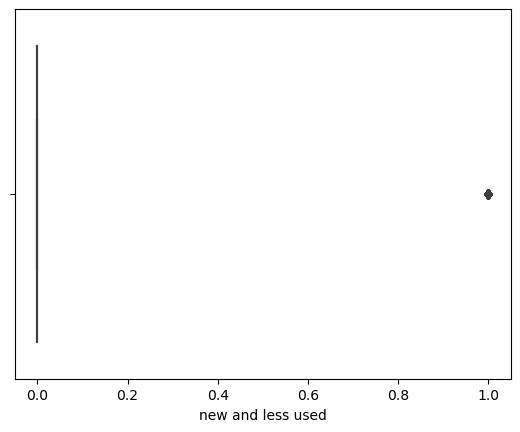

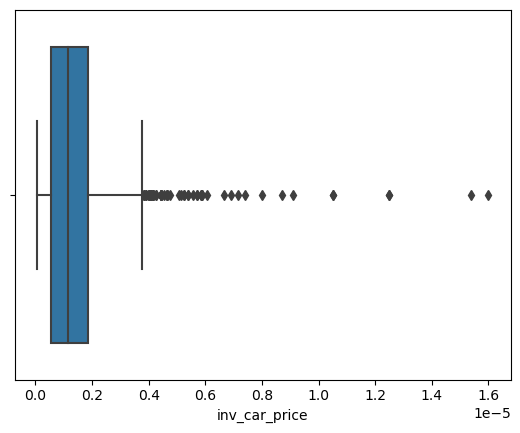

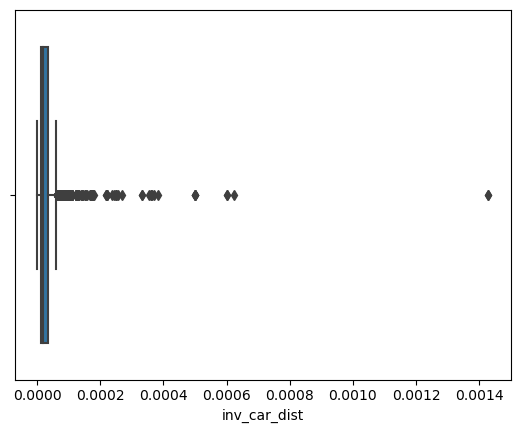

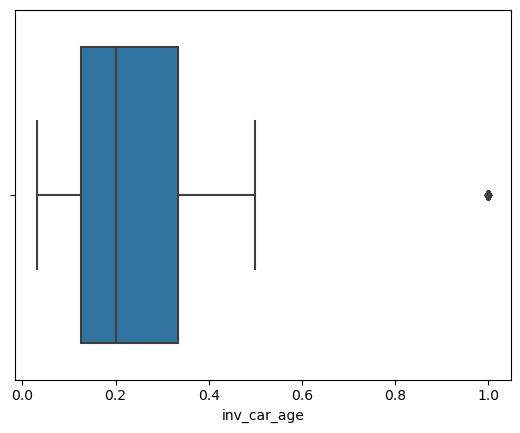

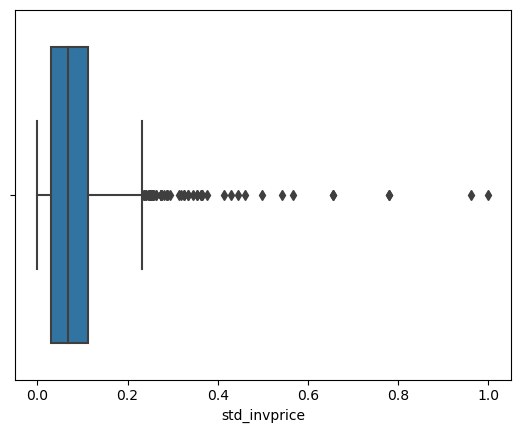

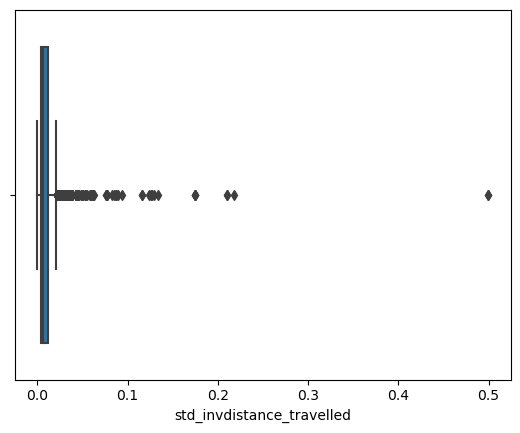

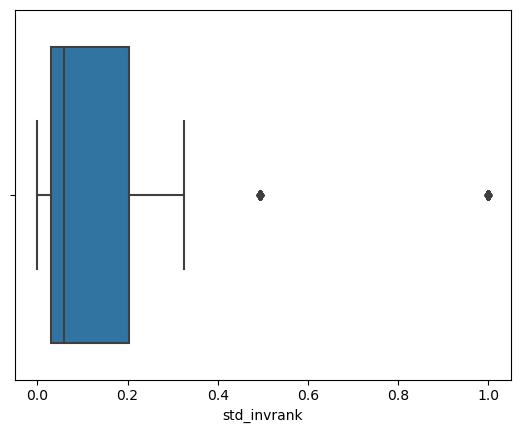

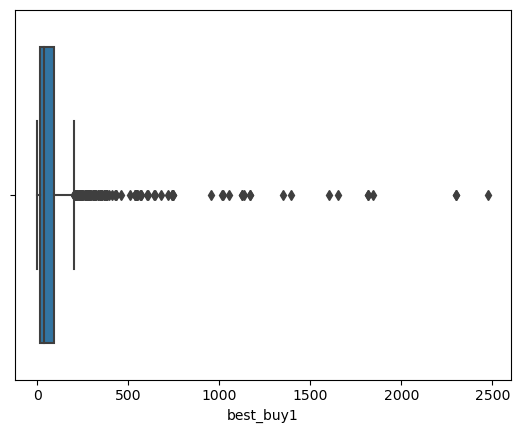

In [28]:
nume=[]
cate=[]
for i in df.columns:
    try:
        sns.boxplot(df[i])
        plt.show()
        nume.append(i)
    except:
        cate.append(i)

In [29]:
cate

['brand', 'model_name', 'fuel_type', 'city']

In [30]:
nume

['year',
 'price',
 'distance_travelled(kms)',
 'car_age',
 'new and less used',
 'inv_car_price',
 'inv_car_dist',
 'inv_car_age',
 'std_invprice',
 'std_invdistance_travelled',
 'std_invrank',
 'best_buy1']

In [31]:
df=df[['brand', 'model_name', 'fuel_type', 'city','year',
 'price',
 'distance_travelled(kms)',
 'car_age',
 'new and less used',
 'inv_car_price',
 'inv_car_dist',
 'inv_car_age',
 'std_invprice',
 'std_invdistance_travelled',
 'std_invrank',
 'best_buy1']]

In [32]:
df

,brand,model_name,fuel_type,city,year,price,distance_travelled(kms),car_age,new and less used,inv_car_price,inv_car_dist,inv_car_age,std_invprice,std_invdistance_travelled,std_invrank,best_buy1
0,Honda,Brio,Petrol,Mumbai,2016,425000.0,9680.0,5.0,0,2.352941e-06,0.000103,0.200000,0.143417,0.035730,0.132143,677.134239
1,Nissan,Sunny,Diesel,Mumbai,2012,325000.0,119120.0,9.0,0,3.076923e-06,0.000008,0.111111,0.188859,0.002496,0.079545,37.501318
2,Toyota,Fortuner,Diesel,Thane,2017,2650000.0,64593.0,4.0,0,3.773585e-07,0.000015,0.250000,0.019416,0.004978,1.000000,96.646020
3,Mercedes-Benz,E-Class,Diesel,Mumbai,2017,4195000.0,25000.0,4.0,1,2.383790e-07,0.000040,0.250000,0.010692,0.013563,0.493750,71.604306
4,Hyundai,Verna,Diesel,Mumbai,2012,475000.0,23800.0,9.0,0,2.105263e-06,0.000042,0.111111,0.127871,0.014269,0.059821,109.150857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,Hyundai,Eon,Petrol,Pune,2015,290000.0,38000.0,6.0,0,3.448276e-06,0.000026,0.166667,0.212168,0.008771,0.059821,111.327773
1721,Bentley,Continental,Petrol,Pune,2011,7500000.0,36000.0,10.0,0,1.333333e-07,0.000028,0.100000,0.004099,0.009283,0.010511,0.399987
1722,Mahindra-Renault,Logan,Diesel,Pune,2008,185000.0,142522.0,13.0,0,5.405405e-06,0.000007,0.076923,0.335011,0.002014,0.029687,20.026662
1723,Mahindra,Jeep,Diesel,Pune,1990,325000.0,18581.0,31.0,0,3.076923e-06,0.000054,0.032258,0.188859,0.018402,0.029687,103.172958


In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [35]:
df.iloc[:,:4]

,brand,model_name,fuel_type,city
0,Honda,Brio,Petrol,Mumbai
1,Nissan,Sunny,Diesel,Mumbai
2,Toyota,Fortuner,Diesel,Thane
3,Mercedes-Benz,E-Class,Diesel,Mumbai
4,Hyundai,Verna,Diesel,Mumbai
...,...,...,...,...
1720,Hyundai,Eon,Petrol,Pune
1721,Bentley,Continental,Petrol,Pune
1722,Mahindra-Renault,Logan,Diesel,Pune
1723,Mahindra,Jeep,Diesel,Pune


In [36]:
two_df=df.iloc[:,4:]
two_df

,year,price,distance_travelled(kms),car_age,new and less used,inv_car_price,inv_car_dist,inv_car_age,std_invprice,std_invdistance_travelled,std_invrank,best_buy1
0,2016,425000.0,9680.0,5.0,0,2.352941e-06,0.000103,0.200000,0.143417,0.035730,0.132143,677.134239
1,2012,325000.0,119120.0,9.0,0,3.076923e-06,0.000008,0.111111,0.188859,0.002496,0.079545,37.501318
2,2017,2650000.0,64593.0,4.0,0,3.773585e-07,0.000015,0.250000,0.019416,0.004978,1.000000,96.646020
3,2017,4195000.0,25000.0,4.0,1,2.383790e-07,0.000040,0.250000,0.010692,0.013563,0.493750,71.604306
4,2012,475000.0,23800.0,9.0,0,2.105263e-06,0.000042,0.111111,0.127871,0.014269,0.059821,109.150857
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,2015,290000.0,38000.0,6.0,0,3.448276e-06,0.000026,0.166667,0.212168,0.008771,0.059821,111.327773
1721,2011,7500000.0,36000.0,10.0,0,1.333333e-07,0.000028,0.100000,0.004099,0.009283,0.010511,0.399987
1722,2008,185000.0,142522.0,13.0,0,5.405405e-06,0.000007,0.076923,0.335011,0.002014,0.029687,20.026662
1723,1990,325000.0,18581.0,31.0,0,3.076923e-06,0.000054,0.032258,0.188859,0.018402,0.029687,103.172958


In [37]:
lis=ohe.fit_transform(df.iloc[:,:4])
lis

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [38]:
col=ohe.get_feature_names_out()
col

array(['brand_Audi', 'brand_BMW', 'brand_Bentley', 'brand_Chevrolet',
       'brand_Datsun', 'brand_Fiat', 'brand_Ford', 'brand_Honda',
       'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep',
       'brand_Kia', 'brand_Lamborghini', 'brand_Land Rover',
       'brand_Lexus', 'brand_MG', 'brand_MINI', 'brand_Mahindra',
       'brand_Mahindra-Renault', 'brand_Maruti Suzuki',
       'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Nissan',
       'brand_Porsche', 'brand_Renault', 'brand_Skoda', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo', 'model_name_3',
       'model_name_3.0', 'model_name_4.4', 'model_name_5', 'model_name_6',
       'model_name_7', 'model_name_718', 'model_name_A-Class',
       'model_name_A-Star', 'model_name_A3', 'model_name_A4',
       'model_name_A6', 'model_name_A8', 'model_name_Abarth',
       'model_name_Accord', 'model_name_Alto', 'model_name_Altroz',
       'model_name_Alturas', 'model_name_Amaze', 'model_name_Ameo',
    

In [39]:
one_df = pd.DataFrame(lis,columns=col)
one_df

,brand_Audi,brand_BMW,brand_Bentley,brand_Chevrolet,brand_Datsun,brand_Fiat,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,...,city_Faridabad,city_Ghaziabad,city_Hyderabad,city_Lucknow,city_Mumbai,city_Navi Mumbai,city_Noida,city_Panchkula,city_Pune,city_Thane
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1700,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
one_df.reset_index(inplace=True,drop='first')

In [41]:
two_df.reset_index(inplace=True,drop='first')

In [42]:
final_df=pd.concat([one_df,two_df],axis=1)
final_df

,brand_Audi,brand_BMW,brand_Bentley,brand_Chevrolet,brand_Datsun,brand_Fiat,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,...,distance_travelled(kms),car_age,new and less used,inv_car_price,inv_car_dist,inv_car_age,std_invprice,std_invdistance_travelled,std_invrank,best_buy1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,9680.0,5.0,0,2.352941e-06,0.000103,0.200000,0.143417,0.035730,0.132143,677.134239
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,119120.0,9.0,0,3.076923e-06,0.000008,0.111111,0.188859,0.002496,0.079545,37.501318
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,64593.0,4.0,0,3.773585e-07,0.000015,0.250000,0.019416,0.004978,1.000000,96.646020
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25000.0,4.0,1,2.383790e-07,0.000040,0.250000,0.010692,0.013563,0.493750,71.604306
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,23800.0,9.0,0,2.105263e-06,0.000042,0.111111,0.127871,0.014269,0.059821,109.150857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,38000.0,6.0,0,3.448276e-06,0.000026,0.166667,0.212168,0.008771,0.059821,111.327773
1700,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36000.0,10.0,0,1.333333e-07,0.000028,0.100000,0.004099,0.009283,0.010511,0.399987
1701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,142522.0,13.0,0,5.405405e-06,0.000007,0.076923,0.335011,0.002014,0.029687,20.026662
1702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18581.0,31.0,0,3.076923e-06,0.000054,0.032258,0.188859,0.018402,0.029687,103.172958


In [43]:
x = final_df.drop('price',axis=1)
y=final_df['price']

In [44]:
x

,brand_Audi,brand_BMW,brand_Bentley,brand_Chevrolet,brand_Datsun,brand_Fiat,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,...,distance_travelled(kms),car_age,new and less used,inv_car_price,inv_car_dist,inv_car_age,std_invprice,std_invdistance_travelled,std_invrank,best_buy1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,9680.0,5.0,0,2.352941e-06,0.000103,0.200000,0.143417,0.035730,0.132143,677.134239
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,119120.0,9.0,0,3.076923e-06,0.000008,0.111111,0.188859,0.002496,0.079545,37.501318
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,64593.0,4.0,0,3.773585e-07,0.000015,0.250000,0.019416,0.004978,1.000000,96.646020
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25000.0,4.0,1,2.383790e-07,0.000040,0.250000,0.010692,0.013563,0.493750,71.604306
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,23800.0,9.0,0,2.105263e-06,0.000042,0.111111,0.127871,0.014269,0.059821,109.150857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,38000.0,6.0,0,3.448276e-06,0.000026,0.166667,0.212168,0.008771,0.059821,111.327773
1700,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36000.0,10.0,0,1.333333e-07,0.000028,0.100000,0.004099,0.009283,0.010511,0.399987
1701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,142522.0,13.0,0,5.405405e-06,0.000007,0.076923,0.335011,0.002014,0.029687,20.026662
1702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18581.0,31.0,0,3.076923e-06,0.000054,0.032258,0.188859,0.018402,0.029687,103.172958


In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Columns: 230 entries, brand_Audi to best_buy1
dtypes: float64(228), int64(2)
memory usage: 3.0 MB


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 33)

In [48]:
x_train.shape,y_train.shape

((1192, 230), (1192,))

In [49]:
x_test.shape,y_test.shape

((512, 230), (512,))

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
Model = RandomForestRegressor()

In [53]:
Model.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
params ={'n_estimators' : [100,500],
        'max_depth':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
         'max_features':['auto','sqrt'],
         'criterion':['squared_error']
        }

In [55]:
grid_rf = GridSearchCV(estimator=Model,
                      param_grid=params,
                      scoring = 'neg_mean_squared_error')

In [57]:
grid_rf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 500]},
             scoring='neg_mean_squared_error')

In [58]:
grid_rf.best_params_

{'criterion': 'squared_error',
 'max_depth': 60,
 'max_features': 'auto',
 'n_estimators': 100}

In [59]:
Model1 = RandomForestRegressor(criterion='squared_error',
 max_depth= 30,
 max_features='auto',
 n_estimators=100)

In [60]:
Model1.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, max_features='auto')

In [61]:
pred=Model1.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error,r2_score

In [63]:
Model1.score(x_train,y_train)

0.9997152424064335

In [64]:
Model1.score(x_test,y_test)

0.9901326675755726

In [65]:
mean_squared_error(y_test,pred)

36040457019.72656

In [66]:
import math
math.sqrt(mean_squared_error(y_test,pred))

189843.24328173115

In [67]:
r2_score(y_test,pred)

0.9901326675755726

<h4 style="color:green">Conclusion</h4>

- R2 : 0.98

In [68]:
import joblib
import pickle

In [69]:
one_hot = joblib.dump(ohe,"one_hot.joblib")

In [70]:
model = joblib.dump(Model1,"model.pkl")

In [71]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 8E56-AFA1

 Directory of C:\Users\HARI KISHAN\cat

27-09-2022  14:17    <DIR>          .
27-09-2022  14:08    <DIR>          ..
27-09-2022  14:13    <DIR>          .ipynb_checkpoints
27-09-2022  13:10             1,408 app.py
27-09-2022  14:13           417,508 CarPrice Prediction.ipynb
07-08-2022  09:04           433,214 Dataset.csv
27-09-2022  14:08    <DIR>          his
27-09-2022  14:17         3,856,334 model.pkl
27-09-2022  14:17             4,412 one_hot.joblib
27-09-2022  14:10    <DIR>          templates
               5 File(s)      4,712,876 bytes
               5 Dir(s)  194,598,682,624 bytes free


In [72]:
ones = joblib.load("one_hot.joblib")
ones

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [73]:
mod = joblib.load("model.pkl")
mod

RandomForestRegressor(max_depth=30, max_features='auto')

In [74]:
x1=df.head(1)
x1

,brand,model_name,fuel_type,city,year,price,distance_travelled(kms),car_age,new and less used,inv_car_price,inv_car_dist,inv_car_age,std_invprice,std_invdistance_travelled,std_invrank,best_buy1
0,Honda,Brio,Petrol,Mumbai,2016,425000.0,9680.0,5.0,0,0.000002,0.000103,0.2,0.143417,0.03573,0.132143,677.134239


In [75]:
x1.shape

(1, 16)

In [76]:
x1.iloc[:,:4]

,brand,model_name,fuel_type,city
0,Honda,Brio,Petrol,Mumbai


In [77]:
x1.iloc[:,4:]

,year,price,distance_travelled(kms),car_age,new and less used,inv_car_price,inv_car_dist,inv_car_age,std_invprice,std_invdistance_travelled,std_invrank,best_buy1
0,2016,425000.0,9680.0,5.0,0,0.000002,0.000103,0.2,0.143417,0.03573,0.132143,677.134239


In [78]:
liss=ones.transform(x1.iloc[:,:4])
liss

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [79]:
coll=ones.get_feature_names_out()
coll

array(['brand_Audi', 'brand_BMW', 'brand_Bentley', 'brand_Chevrolet',
       'brand_Datsun', 'brand_Fiat', 'brand_Ford', 'brand_Honda',
       'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep',
       'brand_Kia', 'brand_Lamborghini', 'brand_Land Rover',
       'brand_Lexus', 'brand_MG', 'brand_MINI', 'brand_Mahindra',
       'brand_Mahindra-Renault', 'brand_Maruti Suzuki',
       'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Nissan',
       'brand_Porsche', 'brand_Renault', 'brand_Skoda', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo', 'model_name_3',
       'model_name_3.0', 'model_name_4.4', 'model_name_5', 'model_name_6',
       'model_name_7', 'model_name_718', 'model_name_A-Class',
       'model_name_A-Star', 'model_name_A3', 'model_name_A4',
       'model_name_A6', 'model_name_A8', 'model_name_Abarth',
       'model_name_Accord', 'model_name_Alto', 'model_name_Altroz',
       'model_name_Alturas', 'model_name_Amaze', 'model_name_Ameo',
    

In [80]:
dd = pd.DataFrame(liss,columns=coll)
dd

,brand_Audi,brand_BMW,brand_Bentley,brand_Chevrolet,brand_Datsun,brand_Fiat,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,...,city_Faridabad,city_Ghaziabad,city_Hyderabad,city_Lucknow,city_Mumbai,city_Navi Mumbai,city_Noida,city_Panchkula,city_Pune,city_Thane
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [81]:
dd1=x1.iloc[:,4:]
dd1

,year,price,distance_travelled(kms),car_age,new and less used,inv_car_price,inv_car_dist,inv_car_age,std_invprice,std_invdistance_travelled,std_invrank,best_buy1
0,2016,425000.0,9680.0,5.0,0,0.000002,0.000103,0.2,0.143417,0.03573,0.132143,677.134239


In [82]:
fin = pd.concat([dd,dd1],axis=1)
fin

,brand_Audi,brand_BMW,brand_Bentley,brand_Chevrolet,brand_Datsun,brand_Fiat,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,...,distance_travelled(kms),car_age,new and less used,inv_car_price,inv_car_dist,inv_car_age,std_invprice,std_invdistance_travelled,std_invrank,best_buy1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,9680.0,5.0,0,0.000002,0.000103,0.2,0.143417,0.03573,0.132143,677.134239


In [83]:
fin=fin.drop('price',axis=1)


In [84]:
fin.shape

(1, 230)

In [85]:
mod.predict(fin)

array([424860.])

In [86]:
pwd

'C:\\Users\\HARI KISHAN\\cat'

In [87]:
import sklearn

In [88]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 1.1.2.


In [89]:
pwd

'C:\\Users\\HARI KISHAN\\cat'